In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
selected_parameters = pd.read_csv('data/light_sensitivity_parameter_exploration/light_sensitivity_selected_parameters.csv', index_col=0)
selected_parameters = selected_parameters[selected_parameters['sleep_time'] >= 6.5]

In [94]:
selected_parameters

,p,k,tauc,sleep_time,number_of_switches,x_f,xc_f,n_f,H_f,S_f
1,0.2,-1.0,23.8,6.850718,2.0,-0.276936,-1.011202,0.186380,16.332319,1.0
5,0.2,-0.5,23.5,7.020612,2.0,-0.495982,-0.942333,0.186380,15.348629,1.0
6,0.2,-0.5,23.8,6.590881,2.0,-0.289185,-1.025809,0.186380,16.126797,1.0
10,0.2,0.0,23.5,7.570269,2.0,-0.729538,-0.780259,0.186380,14.370283,1.0
11,0.2,0.0,23.8,7.330418,2.0,-0.630797,-0.881777,0.186380,14.798438,1.0
...,...,...,...,...,...,...,...,...,...,...
119,1.0,0.5,24.7,6.730793,2.0,-0.353051,-1.024971,0.118595,15.869990,1.0
121,1.0,1.0,23.8,6.845721,1.0,-0.901645,-0.308692,0.118595,14.106793,1.0
122,1.0,1.0,24.1,7.475328,1.0,-0.844260,-0.619807,0.118595,13.885330,1.0
123,1.0,1.0,24.4,7.575265,2.0,-0.730843,-0.798601,0.118595,14.380597,1.0


In [95]:
simulation_features = pd.read_csv("data/light_sensitivity_chang14/light_sensitivity_parameters_simulation_features.csv", index_col=0)

In [96]:
# Calculate phase shift
phase_shifts = []
parameter_values = []
# ebook first
reading_condition = simulation_features['simulation_condition'] == 'ebook_first'
ebook_first_data = simulation_features[reading_condition]
cbtmin_day_6 = ebook_first_data[ebook_first_data['day'] == 6]['cbtmin']
cbtmin_day_12 = ebook_first_data[ebook_first_data['day'] == 12]['cbtmin']
phase_shift = cbtmin_day_6.values - cbtmin_day_12.values
phase_shifts.extend(phase_shift)
parameter_values.extend(selected_parameters['p'].values)
# ebook second
reading_condition = simulation_features['simulation_condition'] == 'ebook_second'
ebook_second_data = simulation_features[reading_condition]
cbtmin_day_6 = ebook_second_data[ebook_second_data['day'] == 6]['cbtmin']
cbtmin_day_12 = ebook_second_data[ebook_second_data['day'] == 12]['cbtmin']
phase_shift = cbtmin_day_12.values - cbtmin_day_6.values
phase_shifts.extend(phase_shift)
parameter_values.extend(selected_parameters['p'].values)

There are some pretty large phase shifts that are probably coming from those simulations that drift and don't entrain to the light schedule. I'll remove those from further analysis.

In [97]:
phase_shift_threshold = 5
phase_shifts = np.array(phase_shifts)
mask = abs(phase_shifts) < phase_shift_threshold
phase_shifts = phase_shifts[mask]
parameter_values = np.array(parameter_values)
parameter_values = parameter_values[mask]

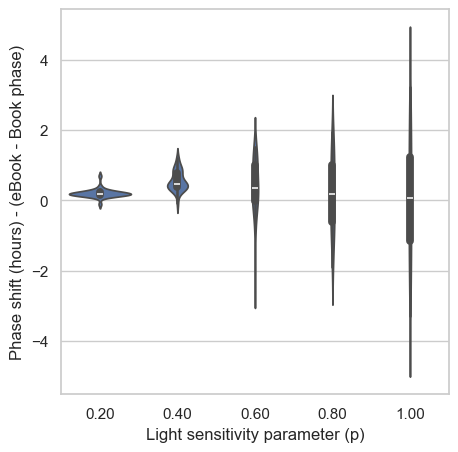

In [98]:
# seaborn violinplot
data = pd.DataFrame({'Phase shift': phase_shifts,
                     'Parameter value': parameter_values})
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
p = sns.violinplot(data=data, x='Parameter value', y='Phase shift', inner="box", 
                   zorder=1)
p.set_xticks(range(len(np.unique(parameter_values))))
p.set_xticklabels([f'{x:.2f}' for x in np.unique(parameter_values)])

plt.xlabel('Light sensitivity parameter (p)') 
plt.ylabel('Phase shift (hours) - (eBook - Book phase)')

plt.show()